# This is a sample Jupyter Notebook


## Basic Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/raw/Corona_NLP_train.csv", encoding='latin1')

# Show basic info

print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

Matplotlib is building the font cache; this may take a moment.


Dataset shape: (41157, 6)

Column names: ['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

Missing values:
 UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


## Distributions

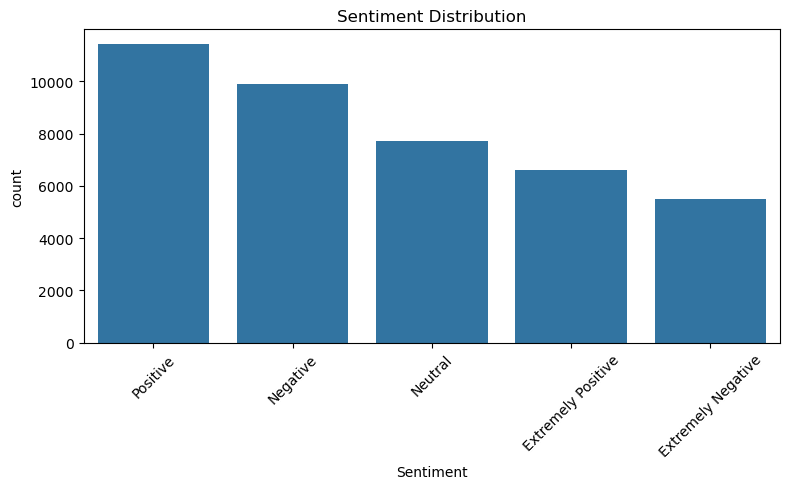

In [2]:

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index)
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


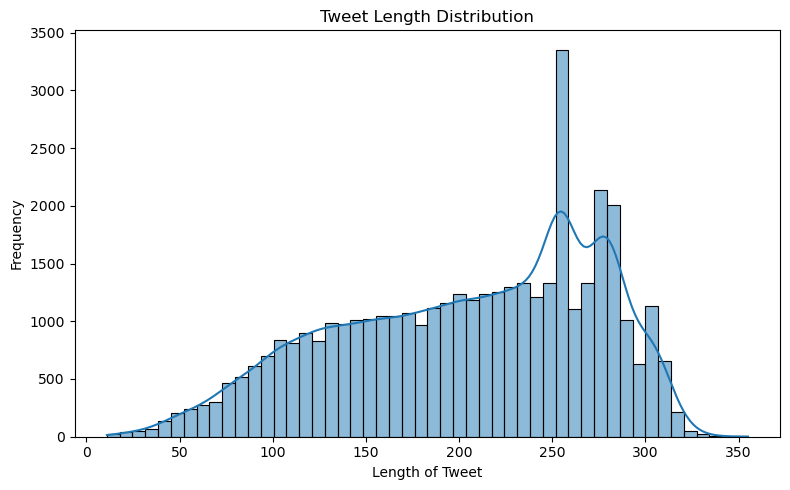

In [3]:
# Tweet length distribution
df['TweetLength'] = df['OriginalTweet'].astype(str).apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['TweetLength'], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

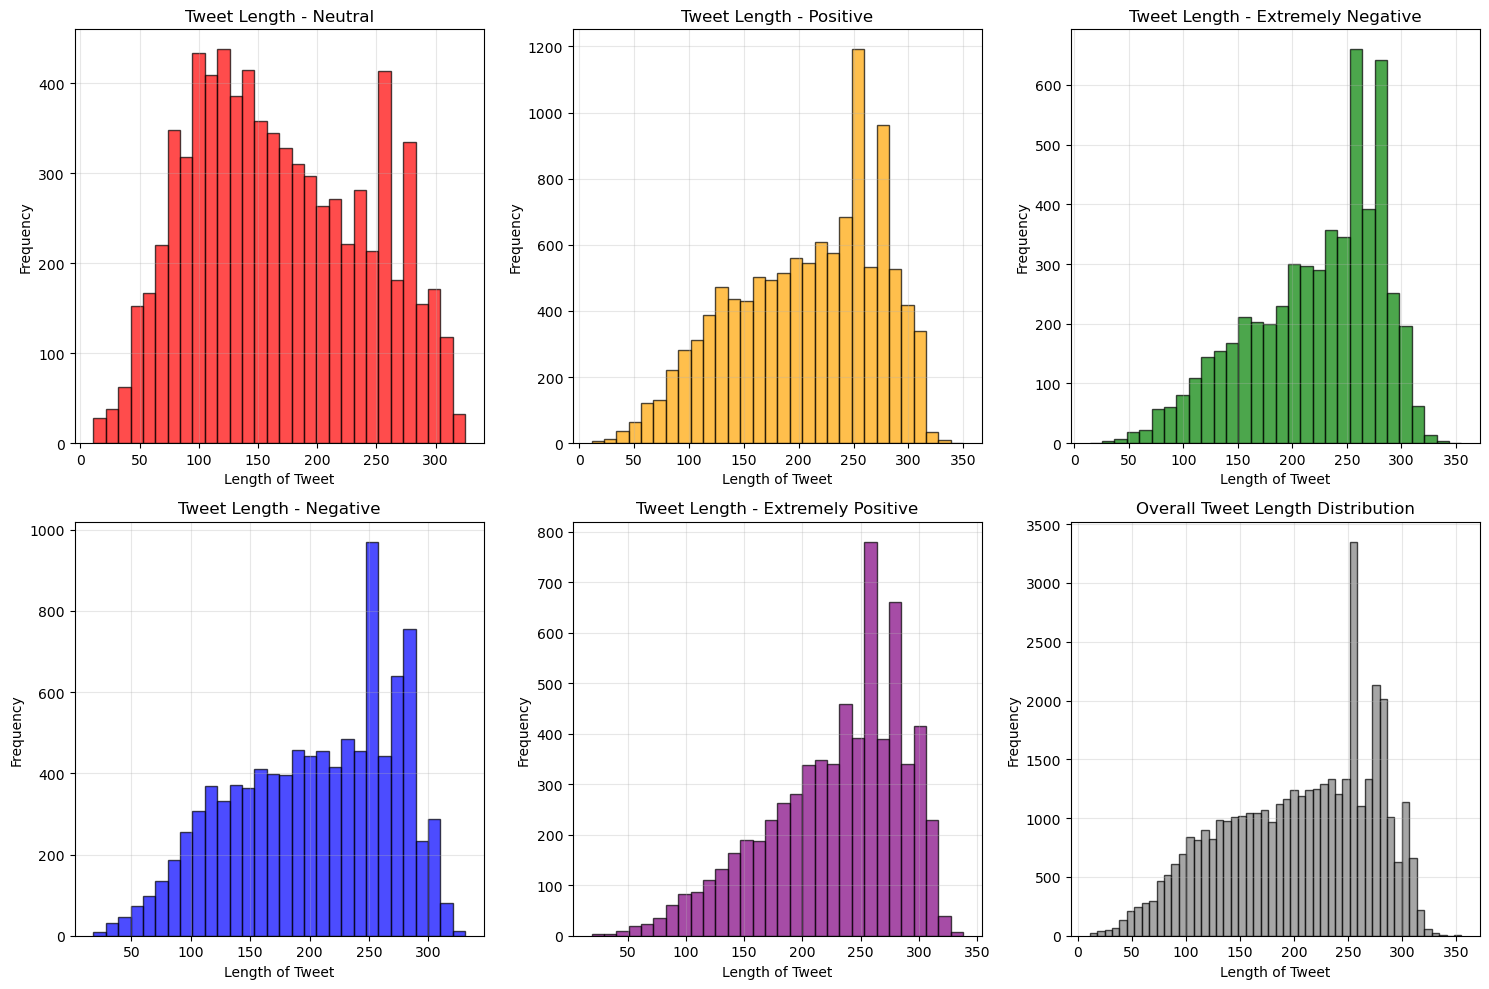

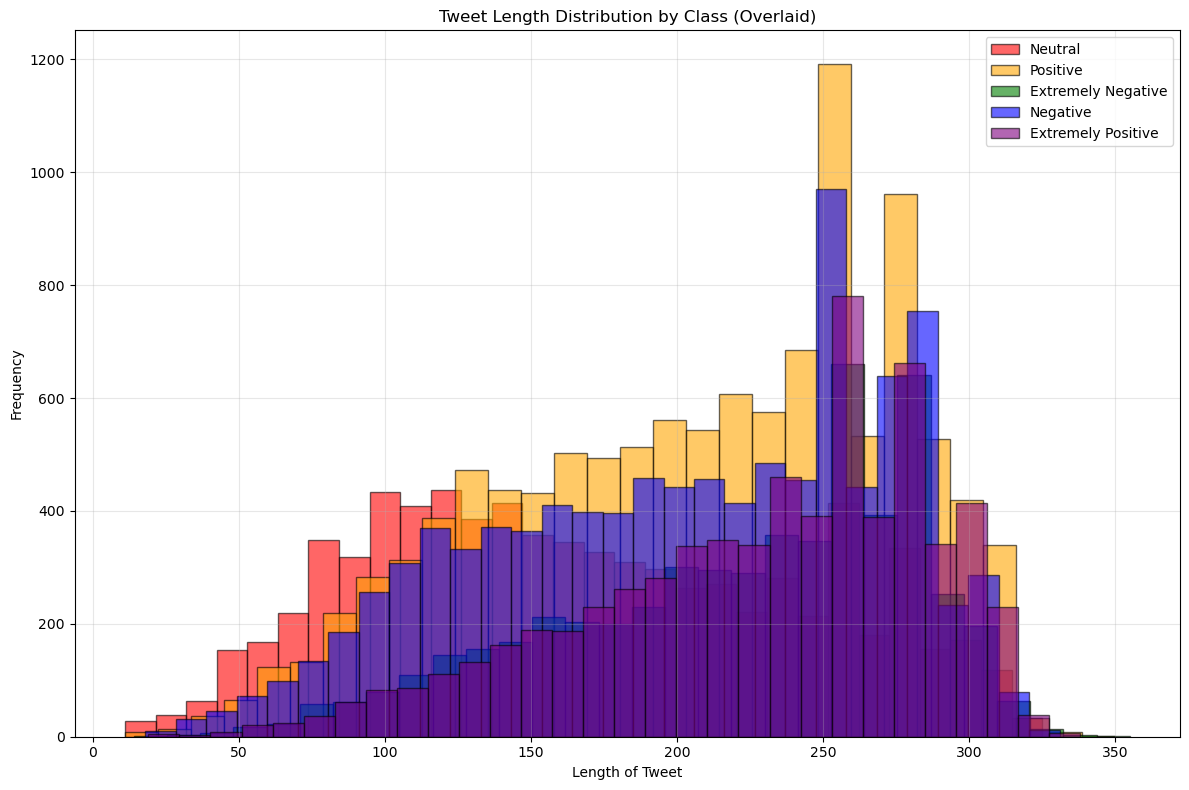

In [4]:
# Updated Tweet Length Analysis with Class-Based Coloring
# Copy this code into Cell 5 of your EDA.ipynb notebook

# Tweet length distribution with class-based coloring
df['TweetLength'] = df['OriginalTweet'].astype(str).apply(len)

# Create a figure with subplots for each class
plt.figure(figsize=(15, 10))

# Get unique class labels
class_labels = df['Sentiment'].unique()
colors = ['red', 'orange', 'green', 'blue', 'purple']  # Different colors for each class

# Create subplots for each class
for i, class_label in enumerate(class_labels):
    plt.subplot(2, 3, i+1)
    
    # Filter data for this class
    class_data = df[df['Sentiment'] == class_label]['TweetLength']
    
    # Create histogram for this class
    plt.hist(class_data, bins=30, alpha=0.7, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'Tweet Length - {class_label}')
    plt.xlabel('Length of Tweet')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

# Add overall distribution
plt.subplot(2, 3, len(class_labels) + 1)
plt.hist(df['TweetLength'], bins=50, alpha=0.7, color='gray', edgecolor='black')
plt.title('Overall Tweet Length Distribution')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Also show the overall distribution with class-based coloring
plt.figure(figsize=(12, 8))
for i, class_label in enumerate(class_labels):
    class_data = df[df['Sentiment'] == class_label]['TweetLength']
    plt.hist(class_data, bins=30, alpha=0.6, label=class_label, 
             color=colors[i % len(colors)], edgecolor='black')

plt.title('Tweet Length Distribution by Class (Overlaid)')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Examples

In [19]:
# Example of a tweet that has no text (only tags and urls)
example_bad_tweet = df[df["Sentiment"] == 'Neutral']["OriginalTweet"].iloc[0]
print(example_bad_tweet)

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8


In [29]:
# Example tweet per sentiment
print('Example tweet per:')
for sentiment in df["Sentiment"].unique():
    example = df[df["Sentiment"] == sentiment]["OriginalTweet"].iloc[1] 
    print(f"{sentiment:=^{60}}\n{example}\n{'='*60}\n")

Example tweet per:
==========================Neutral===========================
Was at the supermarket today. Didn't buy toilet paper. #Rebel

#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ

==========================Positive==========================
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P

=====================Extremely Negative=====================
with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale

==========================Negative==========================
@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the 

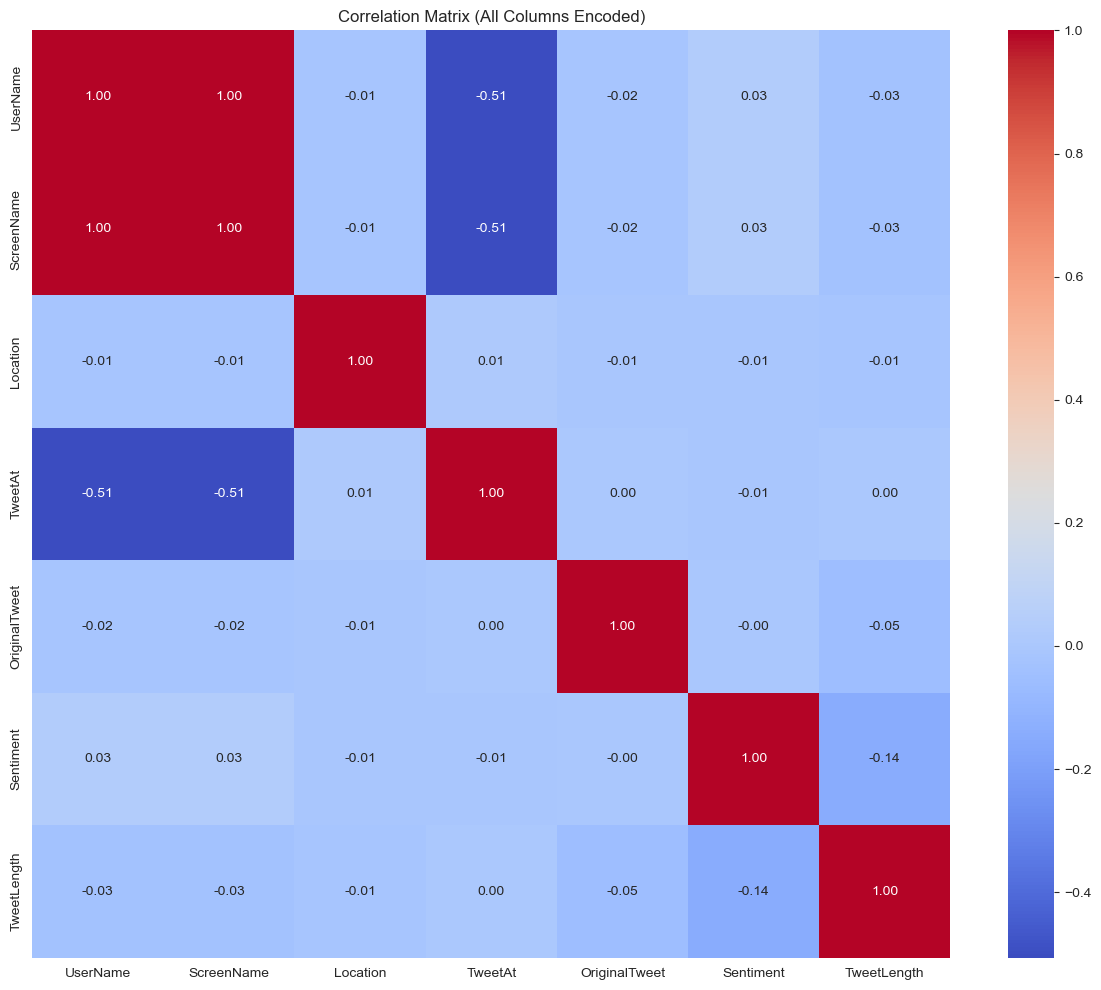

In [34]:
from sklearn.preprocessing import LabelEncoder
# Encode all categorical columns numerically
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le  # Save encoder if needed later

# Correlation matrix
corr_matrix = df_encoded.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Columns Encoded)")
plt.tight_layout()
plt.show()

We noticed that there are a lot of urls ...

In [6]:
import pandas as pd
import re
url_pattern = re.compile(
        r'(?i)\b(?:https?://|ftp://|www\.)[^\s<>\)\]\}"]+'
    )
def extract_urls(text):
    """
    Extract all URLs from a string.
    Returns a list of URL strings.
    """
    return url_pattern.findall(text)


df = pd.read_csv("data/raw/Corona_NLP_train.csv", encoding='latin1')
tweets = df['OriginalTweet']
urls_list = tweets.apply(extract_urls)
urls_count = urls_list.apply(len)
print("Some basic statistics about the number of URLs per tweet:")
print(urls_count.describe())

# print(f"Total tweets with urls: {urls_count}, precentage: {urls_count/len(tweets)}")

Some basic statistics about the number of URLs per tweet:
count    41157.000000
mean         0.582866
std          0.676168
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: OriginalTweet, dtype: float64


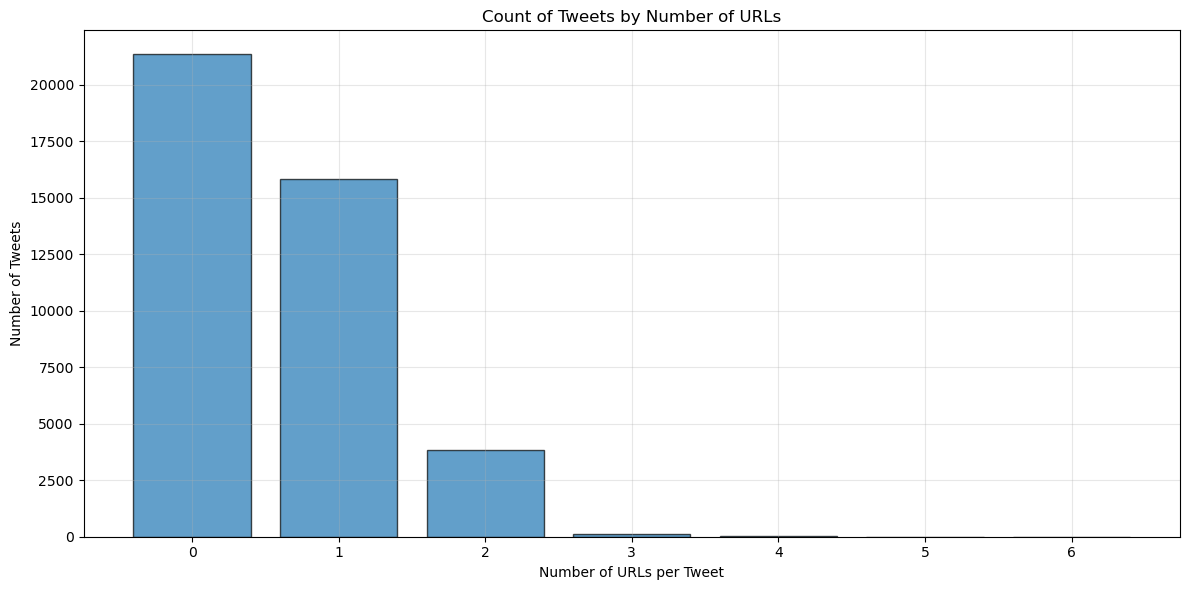


Total tweets with URLs: 19821
Percentage of tweets with URLs: 48.16%
Maximum URLs in a single tweet: 6


In [11]:
import matplotlib.pyplot as plt

url_value_counts = urls_count.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(url_value_counts.index, url_value_counts.values, alpha=0.7, edgecolor='black')
plt.xlabel('Number of URLs per Tweet')
plt.ylabel('Number of Tweets')
plt.title('Count of Tweets by Number of URLs')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some additional statistics
total_tweets_with_urls = (urls_count > 0).sum()
print(f"\nTotal tweets with URLs: {total_tweets_with_urls}")
print(f"Percentage of tweets with URLs: {total_tweets_with_urls/len(tweets)*100:.2f}%")
print(f"Maximum URLs in a single tweet: {urls_count.max()}")


In [21]:
import requests
from bs4 import BeautifulSoup
def get_html_text(url):
    """
    Retrieve HTML text content from a URL.
    """
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an exception for bad status codes
        
        # Parse HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract text content (remove HTML tags)
        text = soup.get_text(strip=True)
        return text
    except Exception as e:
        return f"Error retrieving URL: {str(e)}"

urls = urls_list[2]

# Get HTML text for the first URL
for url in urls:
    html_text = get_html_text(url)
    print(html_text)
    break



Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreakElderly and disabled to get dedicated shopping hours at Woolworths, online delivery suspendedWe’re sorry, this feature is currently unavailable. We’re working to restore it. Please try again later.DismissSkip to sections navigationSkip to contentSkip to footerOur networkOpen NavigationMenuThe Sydney Morning HeraldThe Sydney Morning HeraldcloseSearch SiteSectionsNetworkHomeSydneyNSWPoliticsShow subsectionsFederalNSWVictoriaQueenslandWestern AustraliaBusinessShow subsectionsCompaniesMarketsBulls N' BearsThe economyBanking & financeSmall businessMediaWorkplaceWorldShow subsectionsNorth AmericaEuropeAsiaMiddle EastOceaniaSouth AmericaAfricaNationalShow subsectionsVictoriaQueenslandWestern AustraliaOpinionPropertyShow subsectionsNewsDomain MagazineTitle DeedsLivingAuctionsFinancingSportShow subsectionsNRLRugby unionCricketSoccerAFLRacingTennisNetballBasketballMotorsportCyclingGolfNFLAt